# Getting started

In [1]:
import pymultipleis.multieis as pym

In [2]:
import numpy as onp
import jax.numpy as jnp

In [3]:
# Load the file containing the frequencies
F = jnp.asarray(onp.load('../../../data/redox_exp_50/freq_50.npy'))
# Load the file containing the admittances (a set of 50 spectra)
Y = jnp.asarray(onp.load('../../../data/redox_exp_50/Y_50.npy'))
# Load the file containing the standard deviation of the admittances
Yerr = jnp.asarray(onp.load('../../../data/redox_exp_50/sigma_Y_50.npy'))


In [4]:
print(F.shape)
print(Y.shape)
print(Yerr.shape)

(45,)
(45, 50)
(45, 50)


In [5]:
def par(a, b):
    """
    Defines the total impedance of two circuit elements in parallel
    """
    return 1/(1/a + 1/b)

def redox(p, f):
    w = 2*jnp.pi*f                      # Angular frequency
    s = 1j*w                            # Complex variable
    Rs = p[0]
    Qh = p[1]
    nh = p[2]
    Rct = p[3]
    Wct = p[4]
    Rw = p[5]
    Zw = Wct/jnp.sqrt(w) * (1-1j)       # Planar infinite length Warburg impedance
    Zdl = 1/(s**nh*Qh)                  # admittance of a CPE
    Z = Rs + par(Zdl, Rct + par(Zw, Rw))
    Y = 1/Z
    return jnp.concatenate((Y.real, Y.imag), axis = 0)


In [6]:
# def redox(p, f):
#     w = 2*jnp.pi*f               # Angular frequency
#     s = 1j*w                       # Complex variable
#     Rs = p[0]
#     Qh = p[1]
#     nh = p[2]
#     Rct = p[3]
#     Wct = p[4]
#     Rw = p[5]
#     Zw = Wct/jnp.sqrt(w) * (1-1j) # Planar infinite length Warburg impedance
#     Ydl = s**nh * Qh                # admittance of a CPE
#     Z1 = (1/Zw + 1/Rw)**-1
#     Z2 = (Rct+Z1)
#     Y2 = Z2**-1
#     Y3 = (Ydl + Y2)
#     Z3 = 1/Y3
#     Z = Rs + Z3
#     Y = 1/Z
#     return jnp.concatenate((Y.real, Y.imag), axis = 0)


In [7]:
p0 = jnp.asarray([1.6295e+02, 3.0678e-08, 9.3104e-01, 1.1865e+04, 4.7125e+05, 1.3296e+06])

bounds = [[1e-15,1e15], [1e-9, 1e2], [1e-1,1e0], [1e-15,1e15], [1e-15,1e15], [1e-15,1e15]]

smf_sigma = jnp.asarray([100000., 100000., 100000., 100000., 100000., 100000.]) # Smoothing factor used with the standard deviation

smf_modulus = jnp.asarray([1., 1., 1., 1., 1., 1.]) # Smoothing factor used with the modulus

smf_inf = jnp.asarray([jnp.inf, 1., 1., 1., 1., 1.]) # Smoothing factor used with the modulus

labels = {"Rs":"$\Omega$", "Qh":"$F^{nh}$", "nh":"-", "Rct":"$\Omega$", "Wct":"$\Omega\cdot s^{-0.5}$", "Rw":"$\Omega$"}



1. using the standard deviation as weighting

In [8]:
eis_redox_sigma = pym.Multieis(p0, F, Y, bounds, smf_sigma, redox, weight= Yerr, immittance='admittance')


Using initial

Optimization complete
total time is 0:00:20.097337 

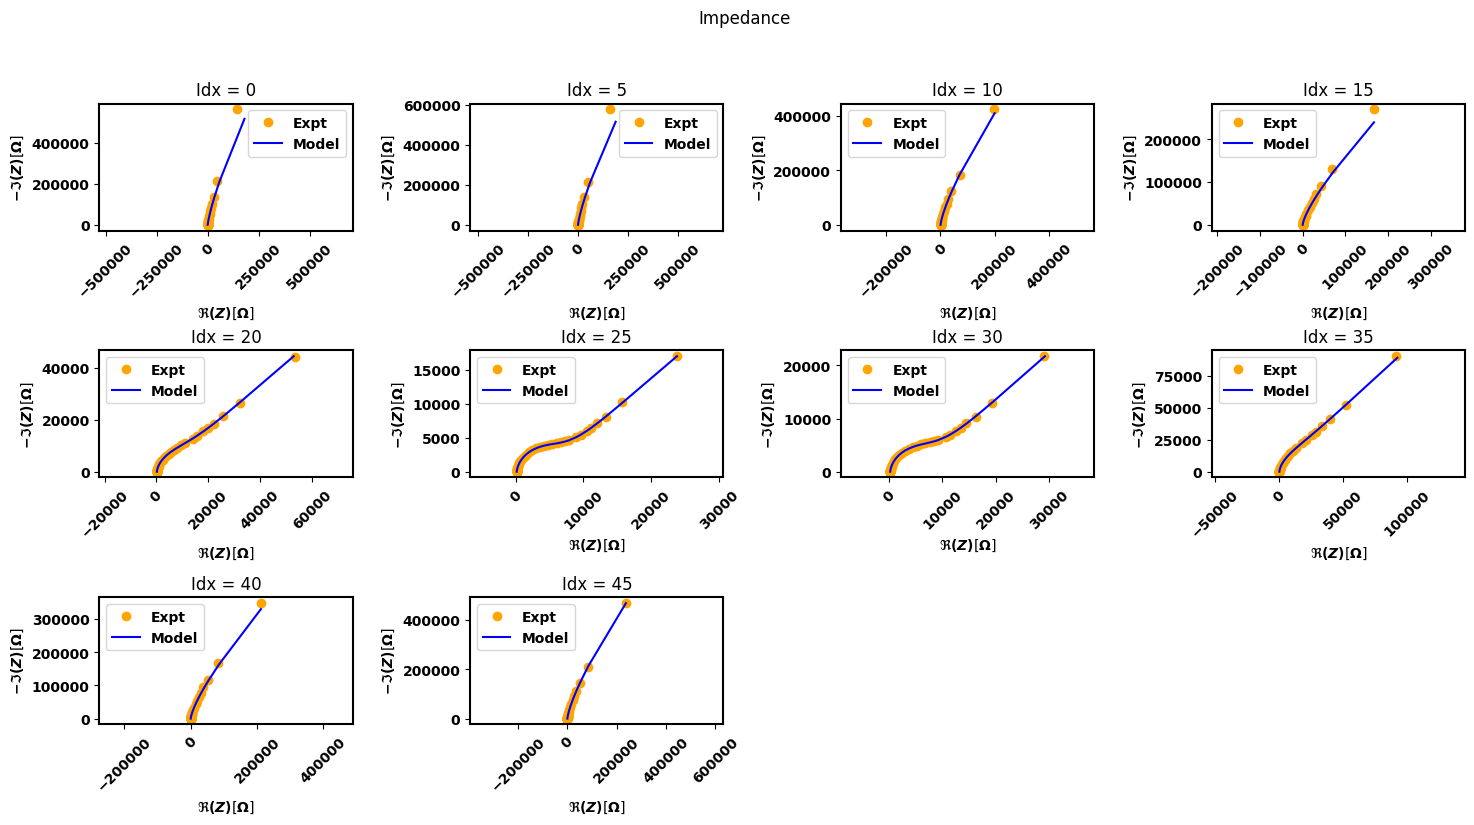

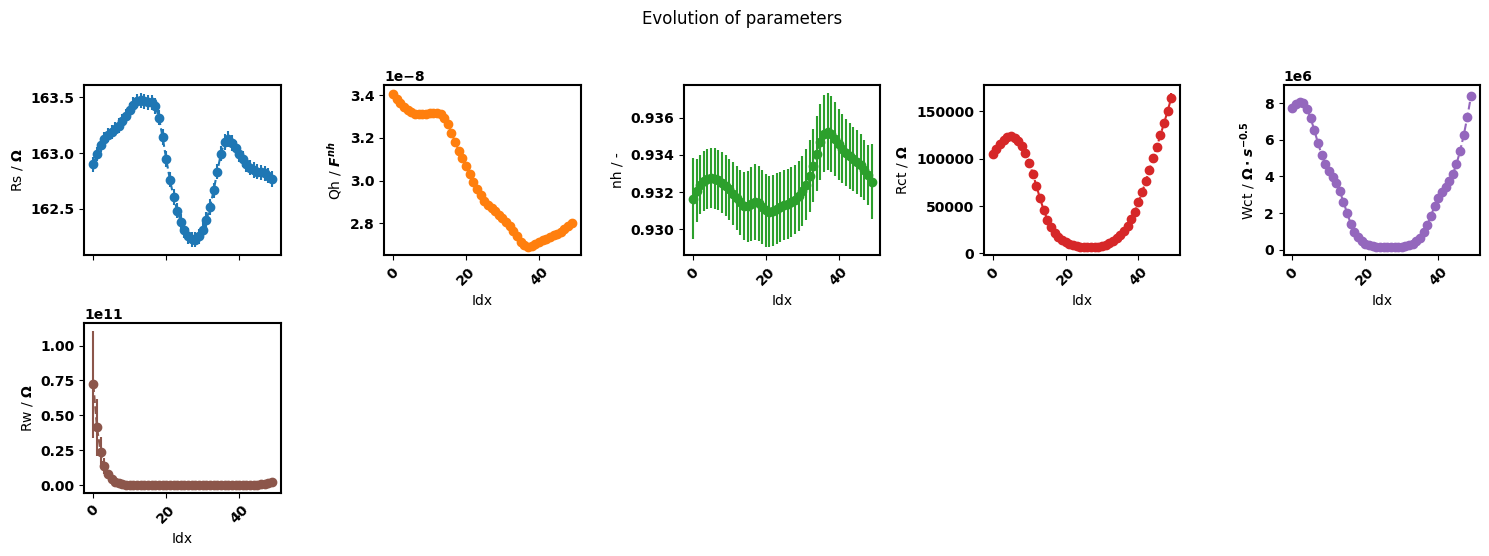

In [ ]:
popt, perr, chisqr, chitot, AIC = eis_redox_sigma.fit_simultaneous(method = 'tnc')
eis_redox_sigma.plot_nyquist(5)
eis_redox_sigma.plot_params(labels=labels)
eis_redox_sigma.plot_params(True, labels=labels)


Using prefit
0: loss=3.958e+04
10000: loss=1.629e+02
20000: loss=2.981e+01
30000: loss=2.880e+01
40000: loss=2.872e+01
50000: loss=2.869e+01
60000: loss=2.870e+01
70000: loss=2.869e+01
80000: loss=2.869e+01
90000: loss=2.870e+01
Optimization complete
total time is 0:01:42.254991 

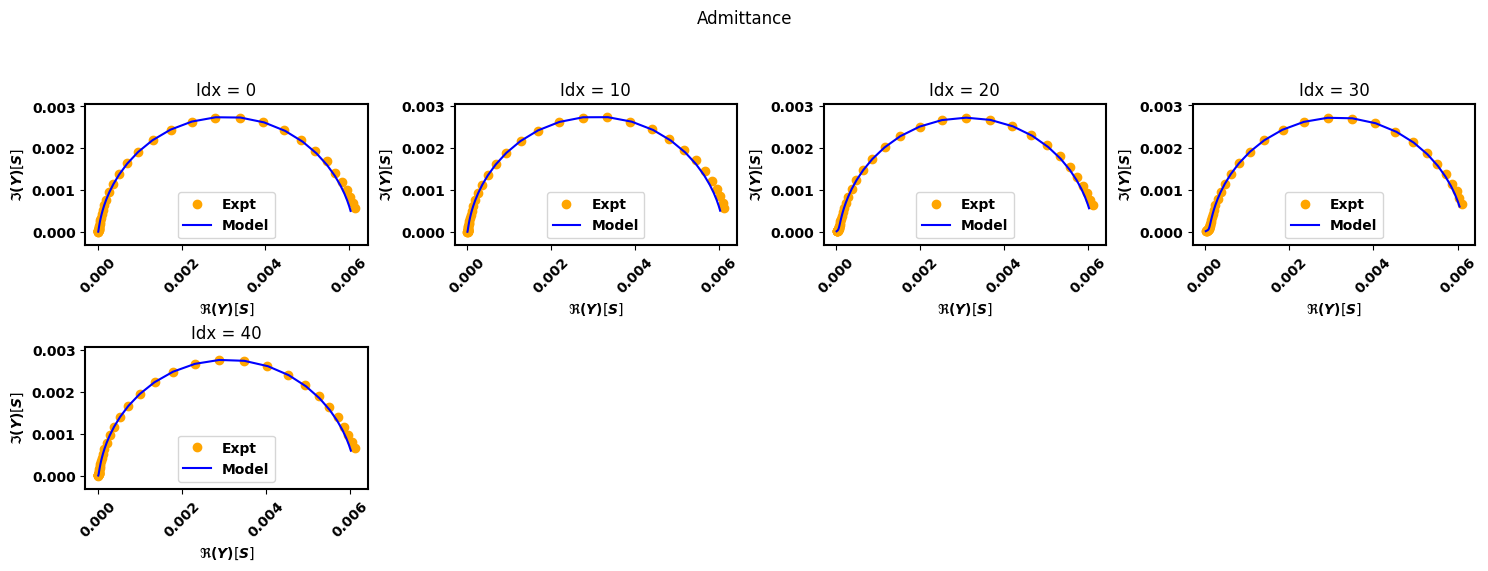

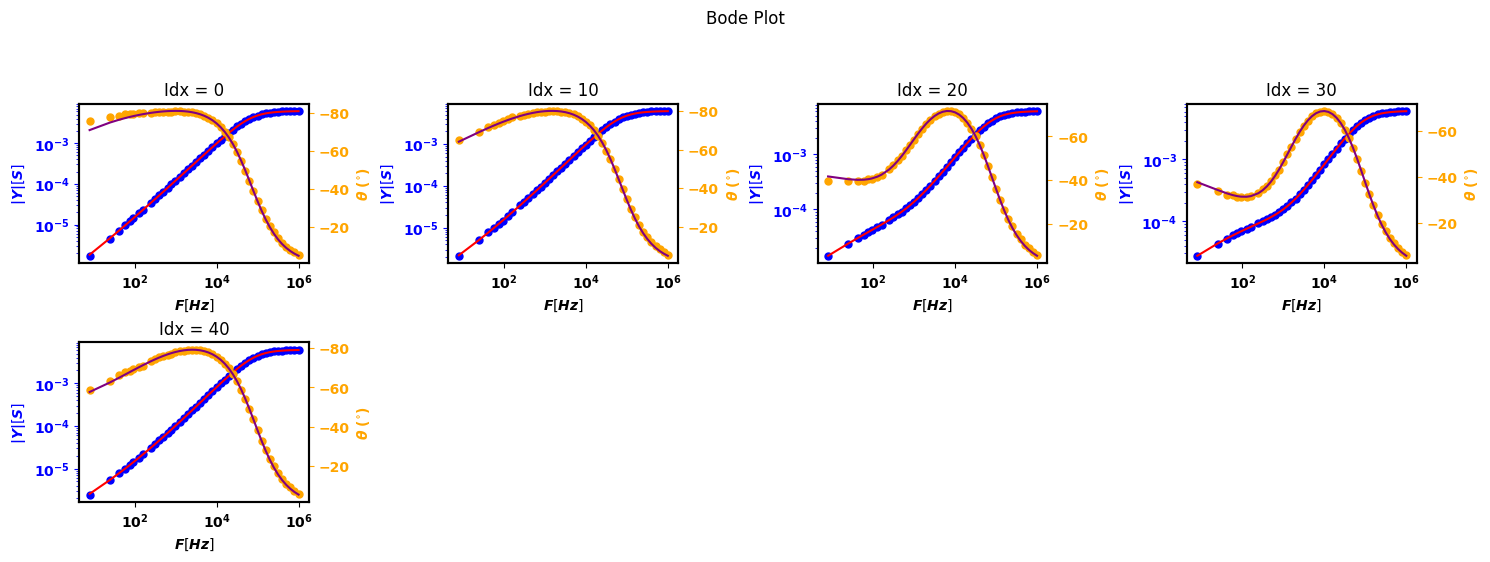

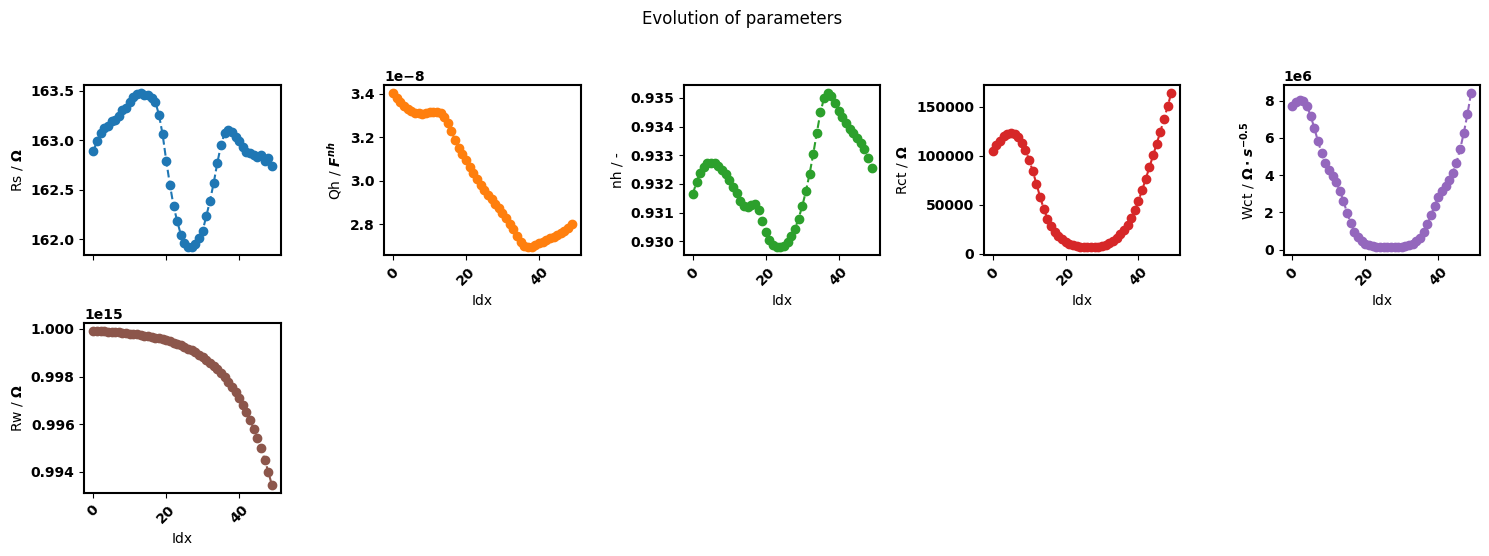

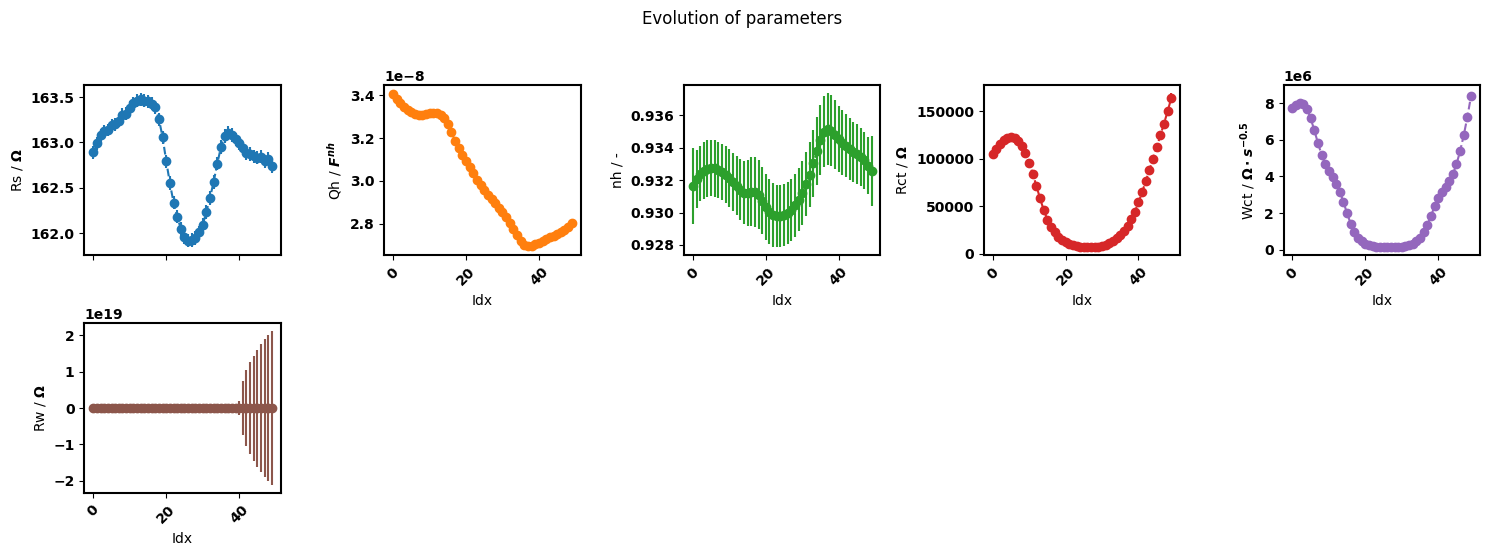

In [ ]:
popt, perr, chisqr, chitot, AIC = eis_redox_sigma.fit_simultaneous_zero()
eis_redox_sigma.plot_nyquist(10)
eis_redox_sigma.plot_bode(steps = 10)
eis_redox_sigma.plot_params(labels=labels)
eis_redox_sigma.plot_params(True, labels=labels)

In [ ]:
popt

DeviceArray([[1.62950528e+02, 1.63014875e+02, 1.63064958e+02,
              1.63105152e+02, 1.63141193e+02, 1.63177730e+02,
              1.63216514e+02, 1.63256494e+02, 1.63295568e+02,
              1.63332094e+02, 1.63364881e+02, 1.63392687e+02,
              1.63414903e+02, 1.63433294e+02, 1.63453724e+02,
              1.63475882e+02, 1.63473585e+02, 1.63404831e+02,
              1.63254153e+02, 1.63122984e+02, 1.62967155e+02,
              1.62804326e+02, 1.62648766e+02, 1.62509768e+02,
              1.62393047e+02, 1.62302438e+02, 1.62241171e+02,
              1.62211682e+02, 1.62215407e+02, 1.62252313e+02,
              1.62321208e+02, 1.62419624e+02, 1.62543092e+02,
              1.62683411e+02, 1.62826279e+02, 1.62951080e+02,
              1.63072583e+02, 1.63131229e+02, 1.63113404e+02,
              1.63050214e+02, 1.62976812e+02, 1.62913412e+02,
              1.62869165e+02, 1.62845234e+02, 1.62836034e+02,
              1.62833263e+02, 1.62829756e+02, 1.62821603e+02,
        

2. Using the modulus as weighting

There are many cases where we do not have the data for the standard deviation of the admittance or impedance. ``pymultipleis`` offers other weighting options. 
In this second example we shall fit using the modulus as the weighting. All you need do is set the weight to the string "modulus".


Using initial

Optimization complete
total time is 0:00:08.001554 

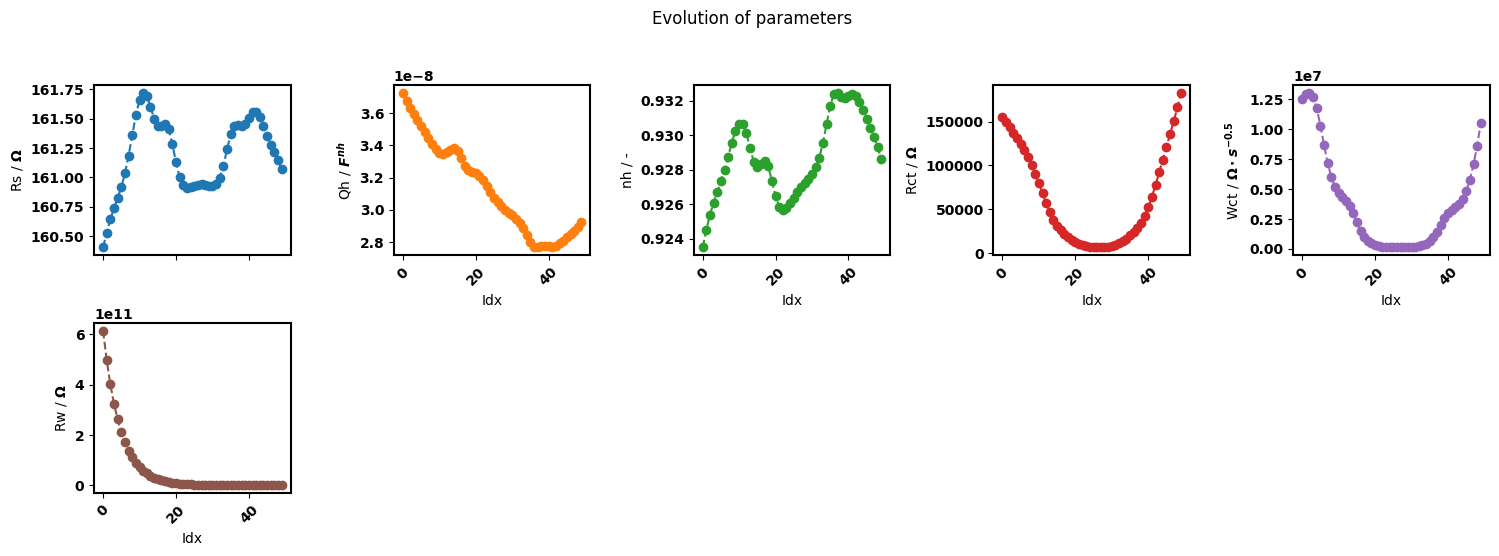

In [ ]:
eis_redox_modulus = pym.Multieis(p0, F, Y, bounds, smf_modulus, redox, weight= 'modulus', immittance='admittance')
popt, perr, chisqr, chitot, AIC = eis_redox_modulus.fit_simultaneous(method = 'tnc')
eis_redox_modulus.plot_nyquist(5)
eis_redox_modulus.plot_params(labels=labels)
eis_redox_modulus.plot_params(True, labels=labels)


Using prefit

Optimization complete
total time is 0:00:16.298245 

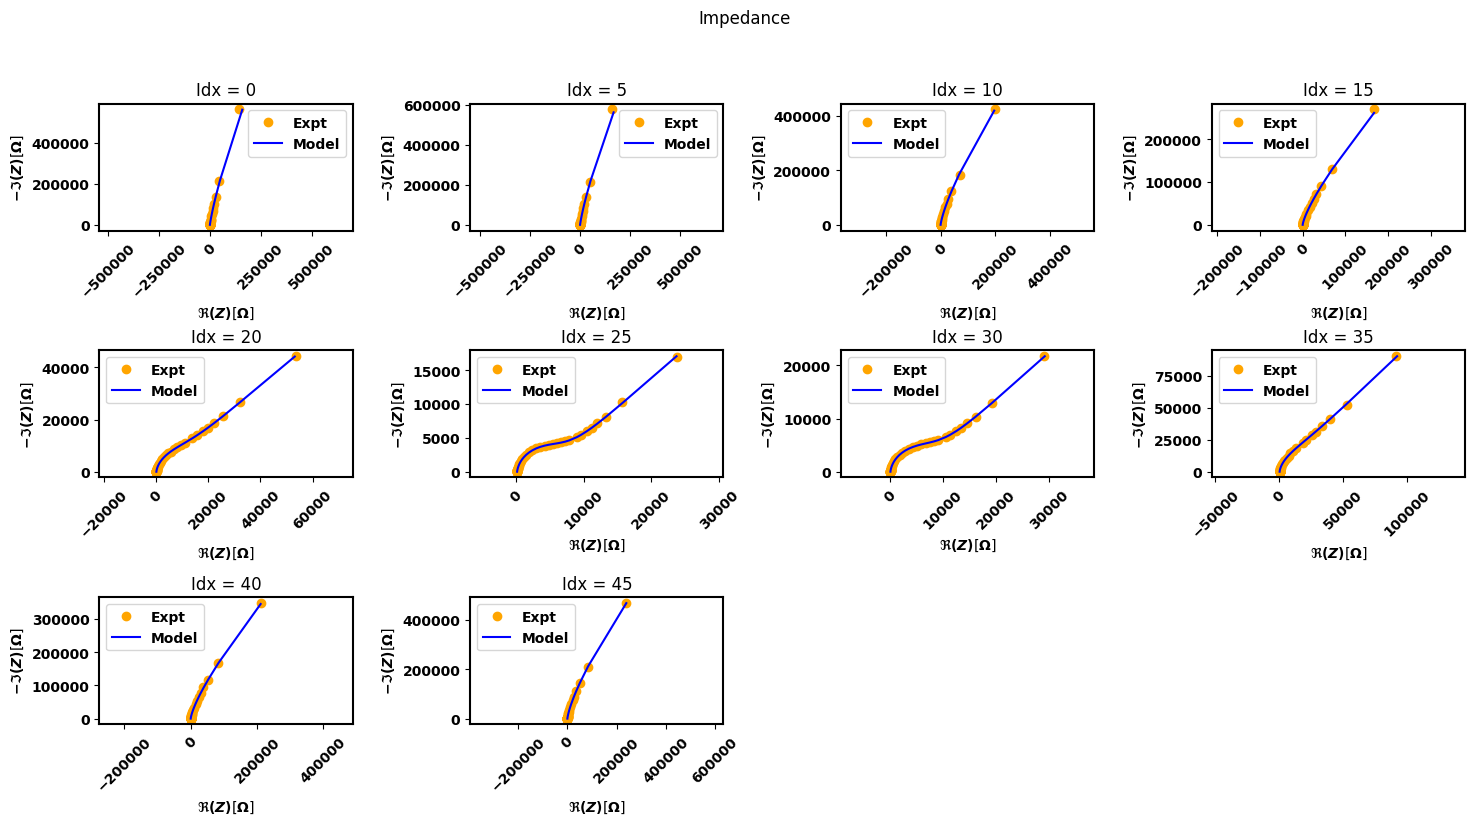

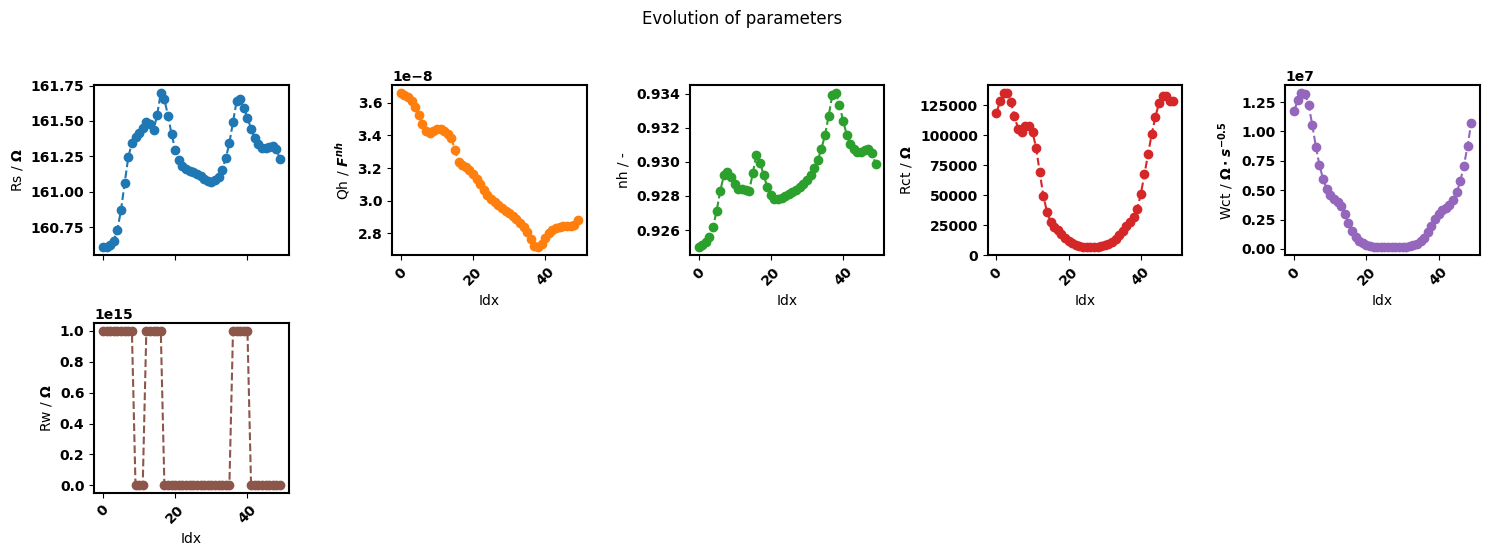

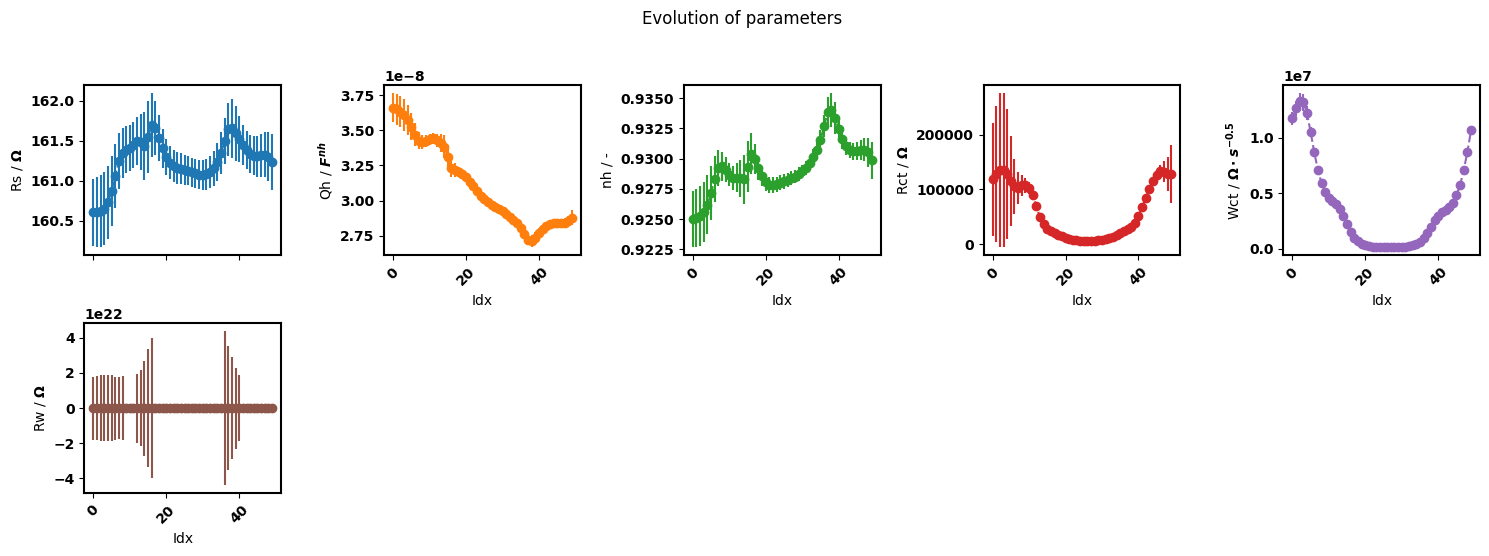

In [ ]:
popt, perr, chisqr, chitot, AIC = eis_redox_modulus.fit_simultaneous_zero(method='bfgs')
eis_redox_modulus.plot_nyquist(5)
eis_redox_modulus.plot_params(labels=labels)
eis_redox_modulus.plot_params(True, labels=labels)

In [ ]:
chisqr

DeviceArray(2.78072333e-05, dtype=float64)

In [ ]:
chitot

DeviceArray(2.78072333e-05, dtype=float64, weak_type=True)

In [ ]:
assert onp.allclose(onp.asarray(chisqr), onp.asarray(chitot), rtol=1e-2, atol=1e-2)


Using initial

Optimization complete
total time is 0:00:08.969426 
Using prefit
fitting spectra 0
fitting spectra 10
fitting spectra 20
fitting spectra 30
fitting spectra 40

Optimization complete
total time is 0:01:16.501874 

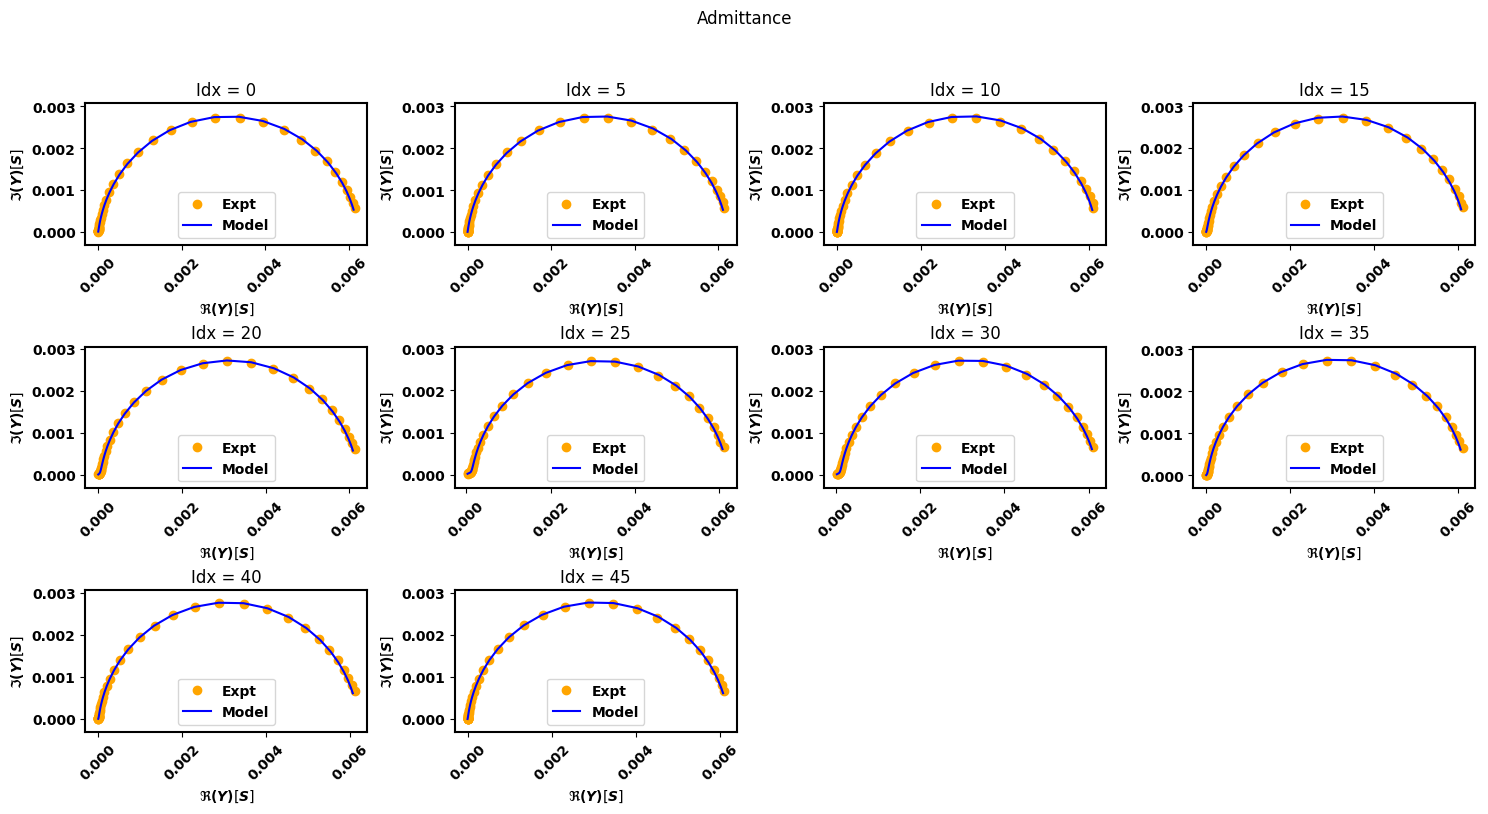

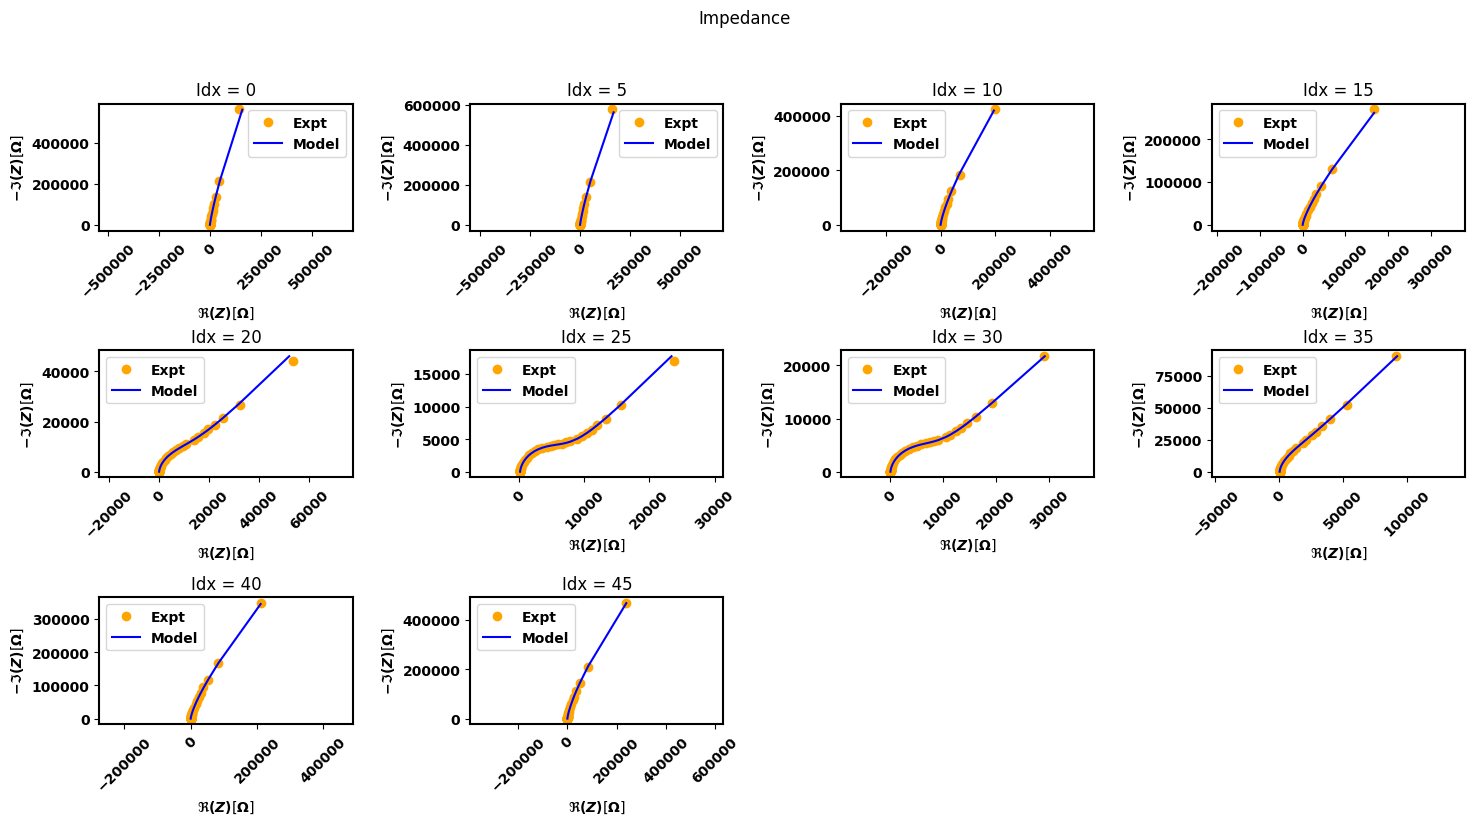

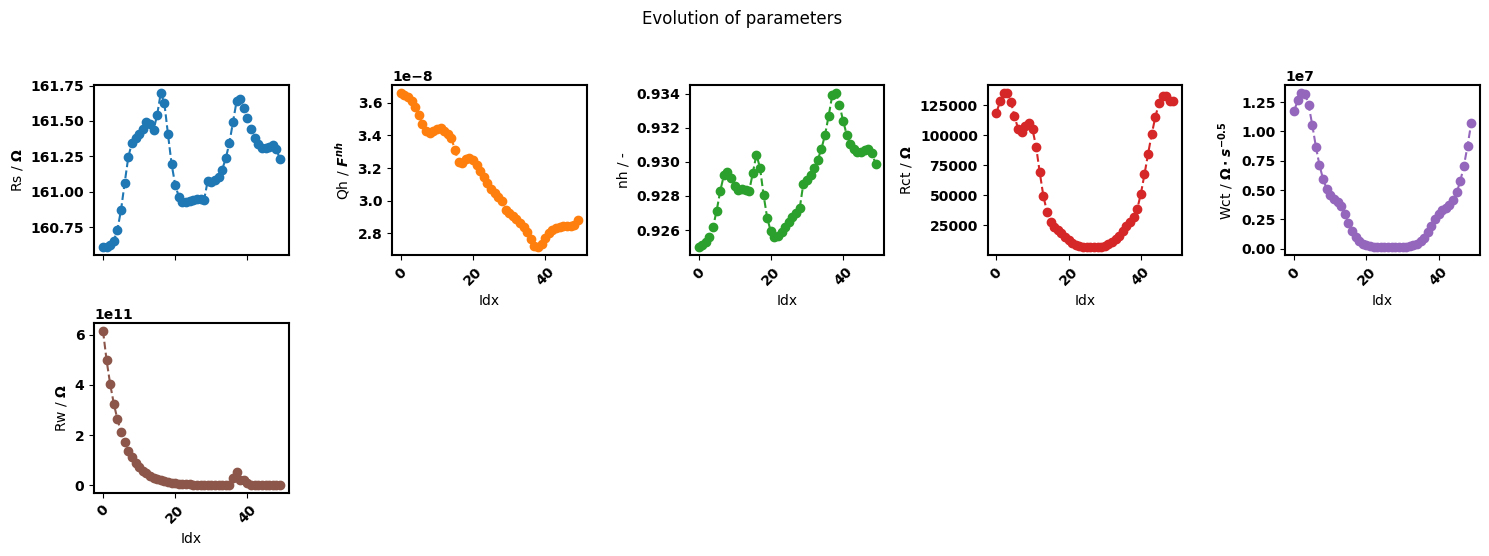

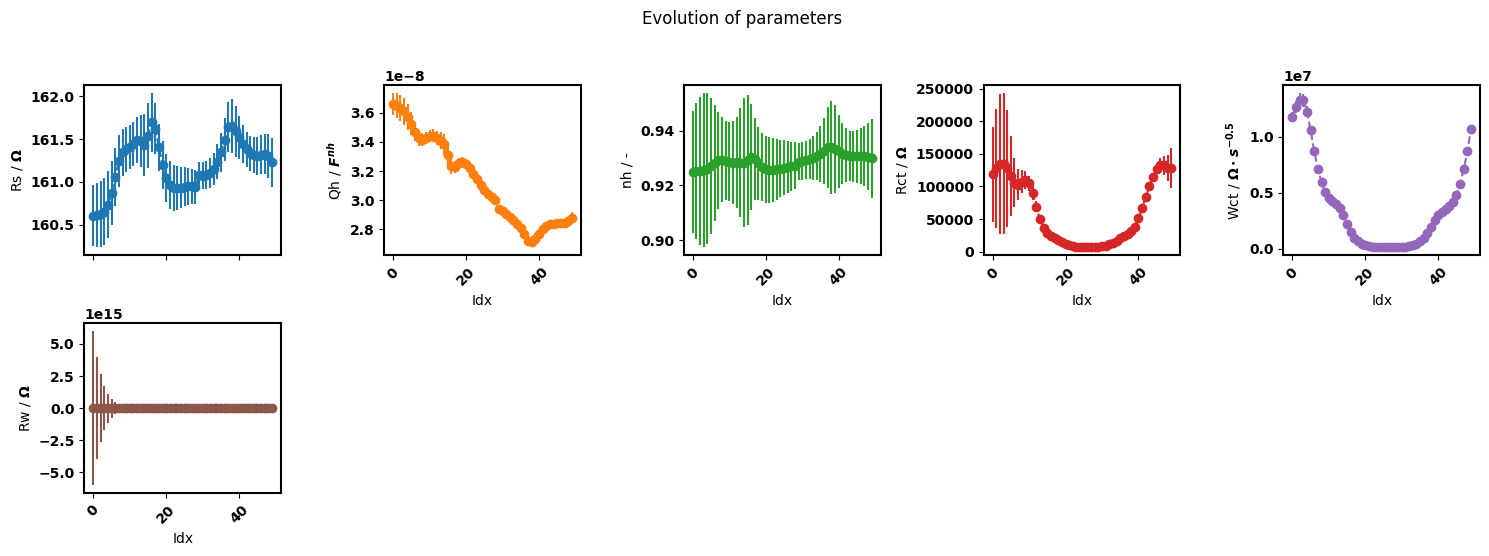

In [ ]:
# Reinstantiate class
eis_redox_modulus = pym.Multieis(p0, F, Y, bounds, smf_modulus, redox, weight= 'modulus', immittance='admittance')
popt, perr, chisqr, chitot, AIC = eis_redox_modulus.fit_simultaneous(method = 'tnc')
popt, perr, chisqr, chitot, AIC = eis_redox_modulus.fit_sequential(indices=None)
eis_redox_modulus.plot_nyquist(5)
eis_redox_modulus.plot_params(show_errorbar = False, labels = labels)
eis_redox_modulus.plot_params(show_errorbar = True, labels = labels)

3. Fitting with the stochastic option


Using initial
0: loss=4.119e-01
10000: loss=4.565e-05
20000: loss=3.768e-05
30000: loss=3.753e-05
40000: loss=3.749e-05
50000: loss=3.748e-05
60000: loss=3.747e-05
70000: loss=3.746e-05
80000: loss=3.746e-05
90000: loss=3.745e-05
Optimization complete
total time is 0:02:05.958072 

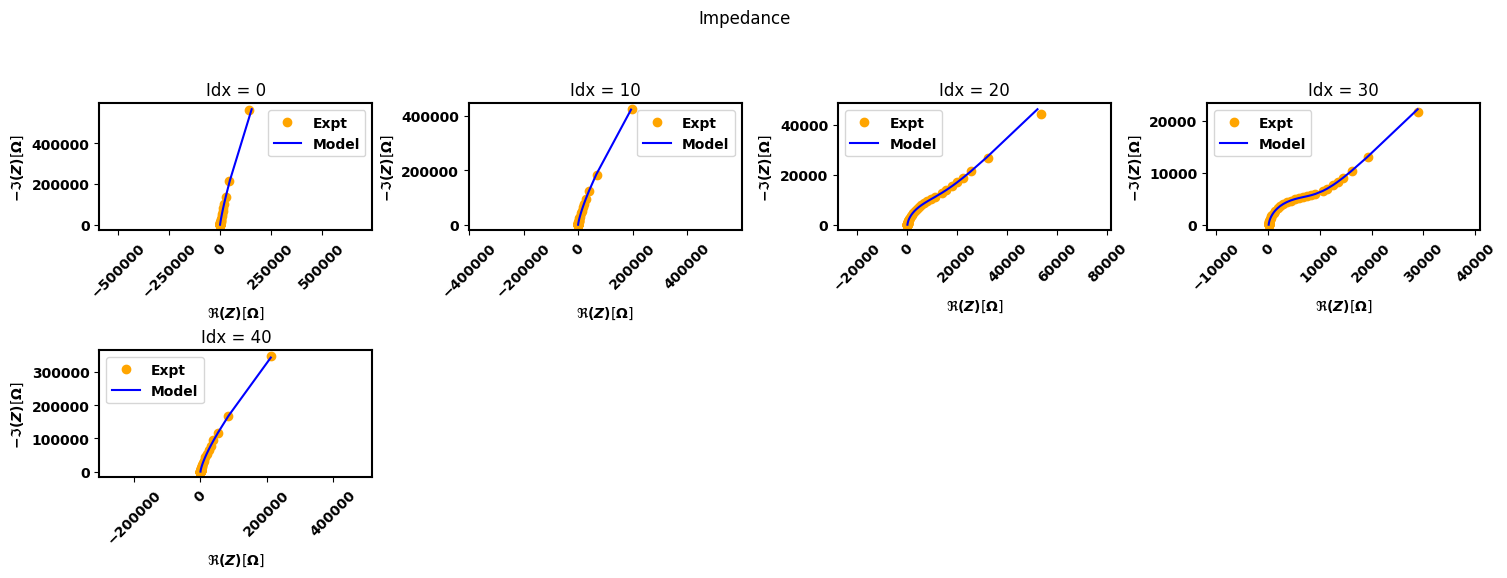

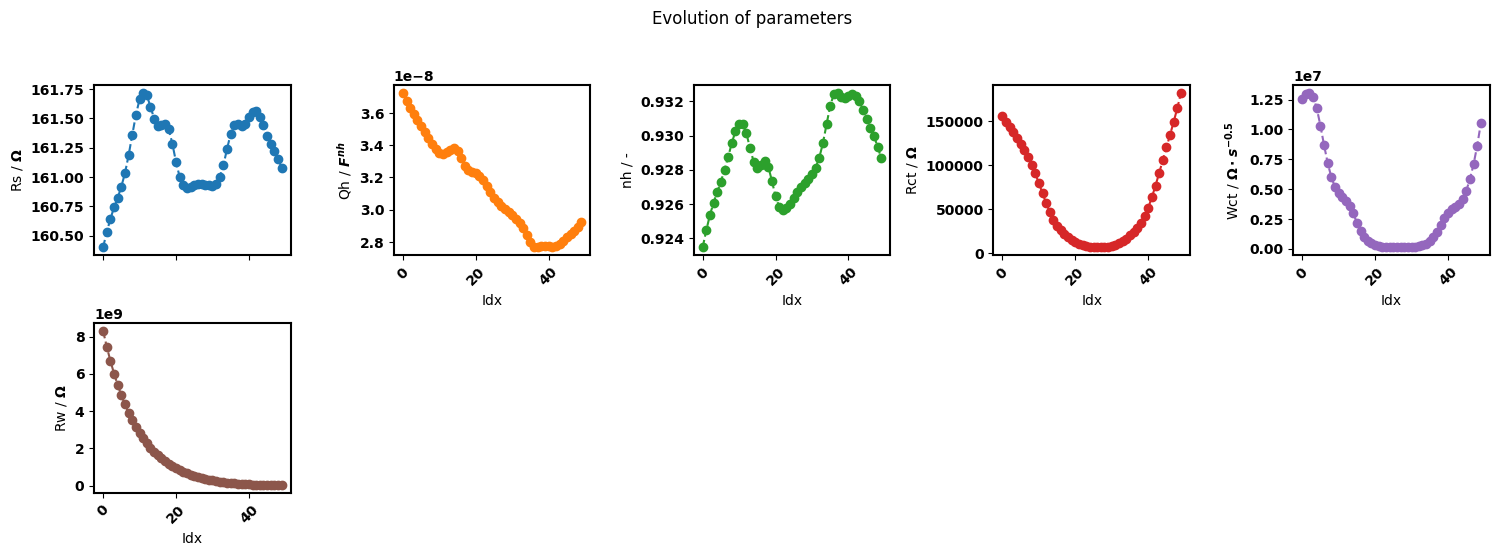

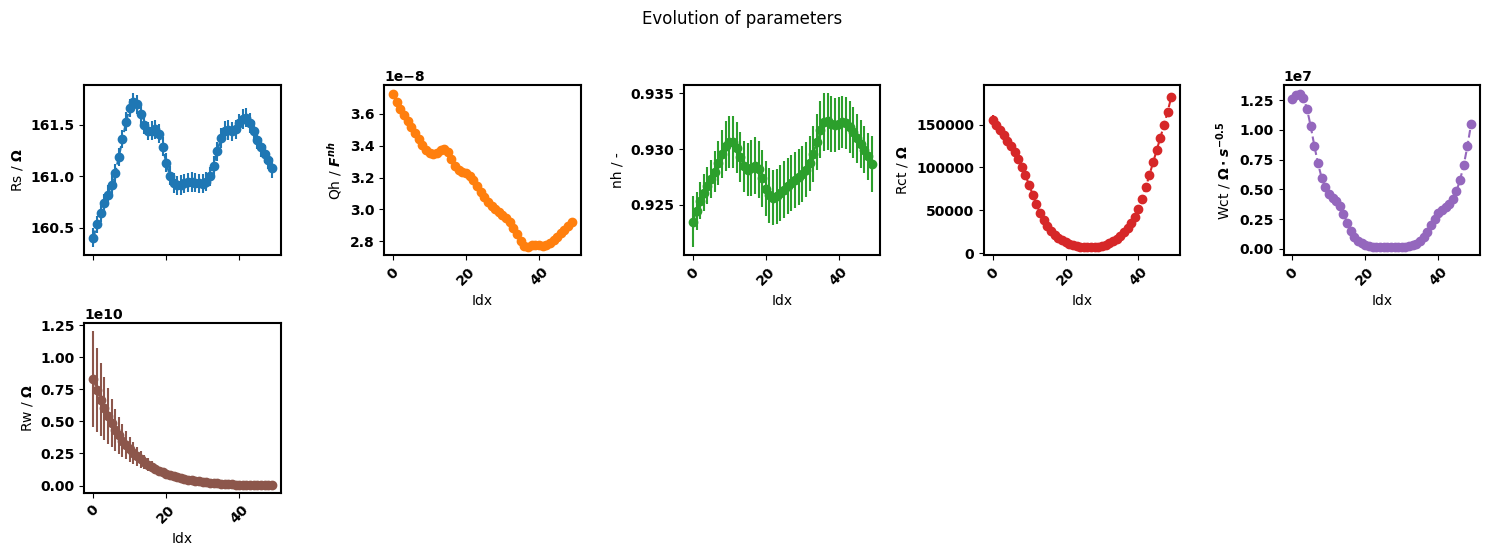

In [ ]:
# Reinstantiate class and fit stochastic
eis_redox_modulus = pym.Multieis(p0, F, Y, bounds, smf_modulus, redox, weight= 'modulus', immittance='admittance')
popt, perr, chisqr, chitot, AIC = eis_redox_modulus.fit_stochastic()
eis_redox_modulus.plot_nyquist(10)
eis_redox_modulus.plot_params(show_errorbar = False, labels = labels)
eis_redox_modulus.plot_params(show_errorbar = True, labels = labels)


Using prefit
fitting spectra 0
fitting spectra 10
fitting spectra 20
fitting spectra 30
fitting spectra 40

Optimization complete
total time is 0:01:49.128988 

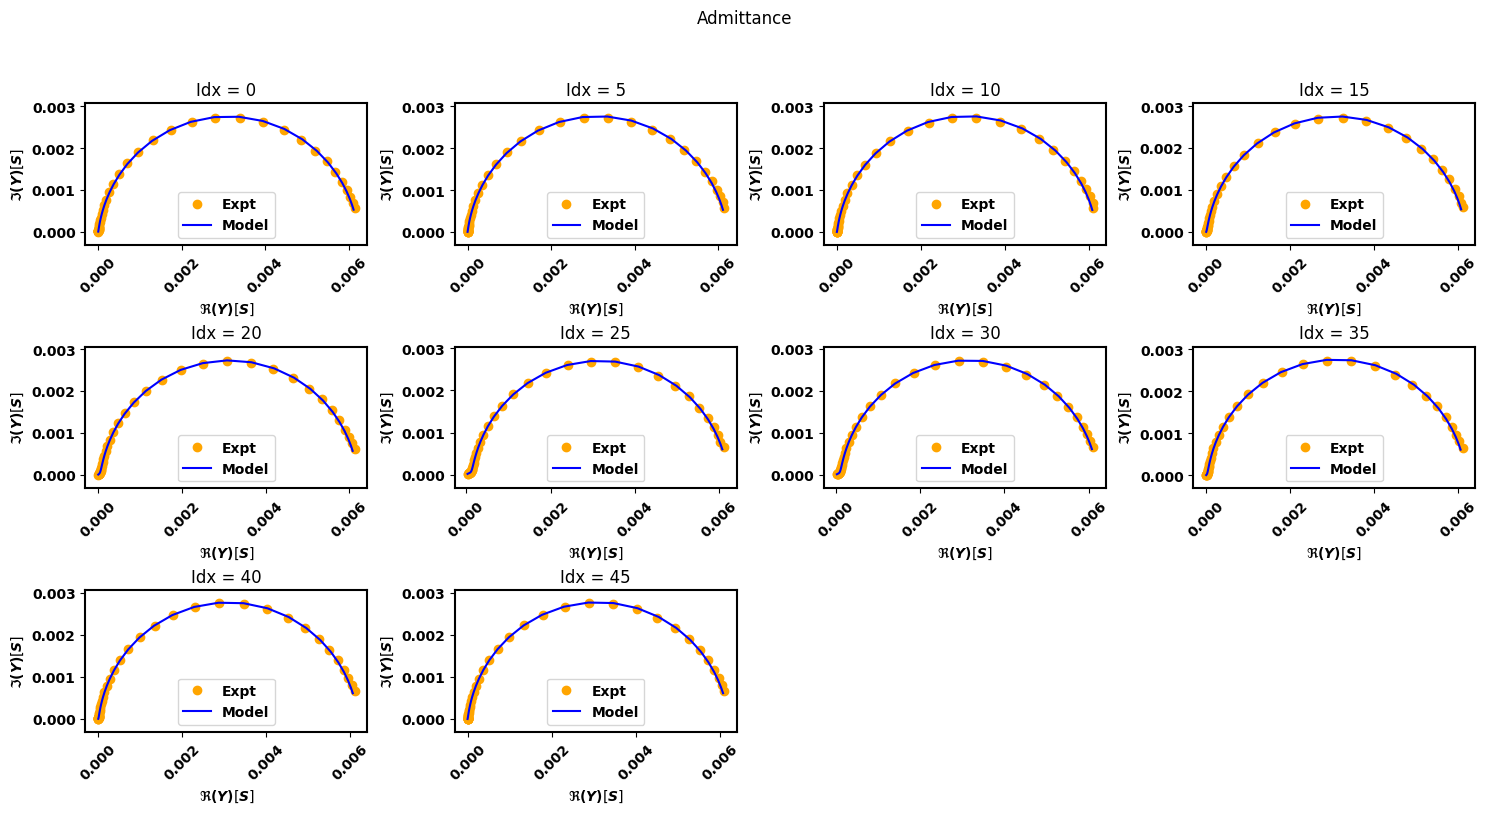

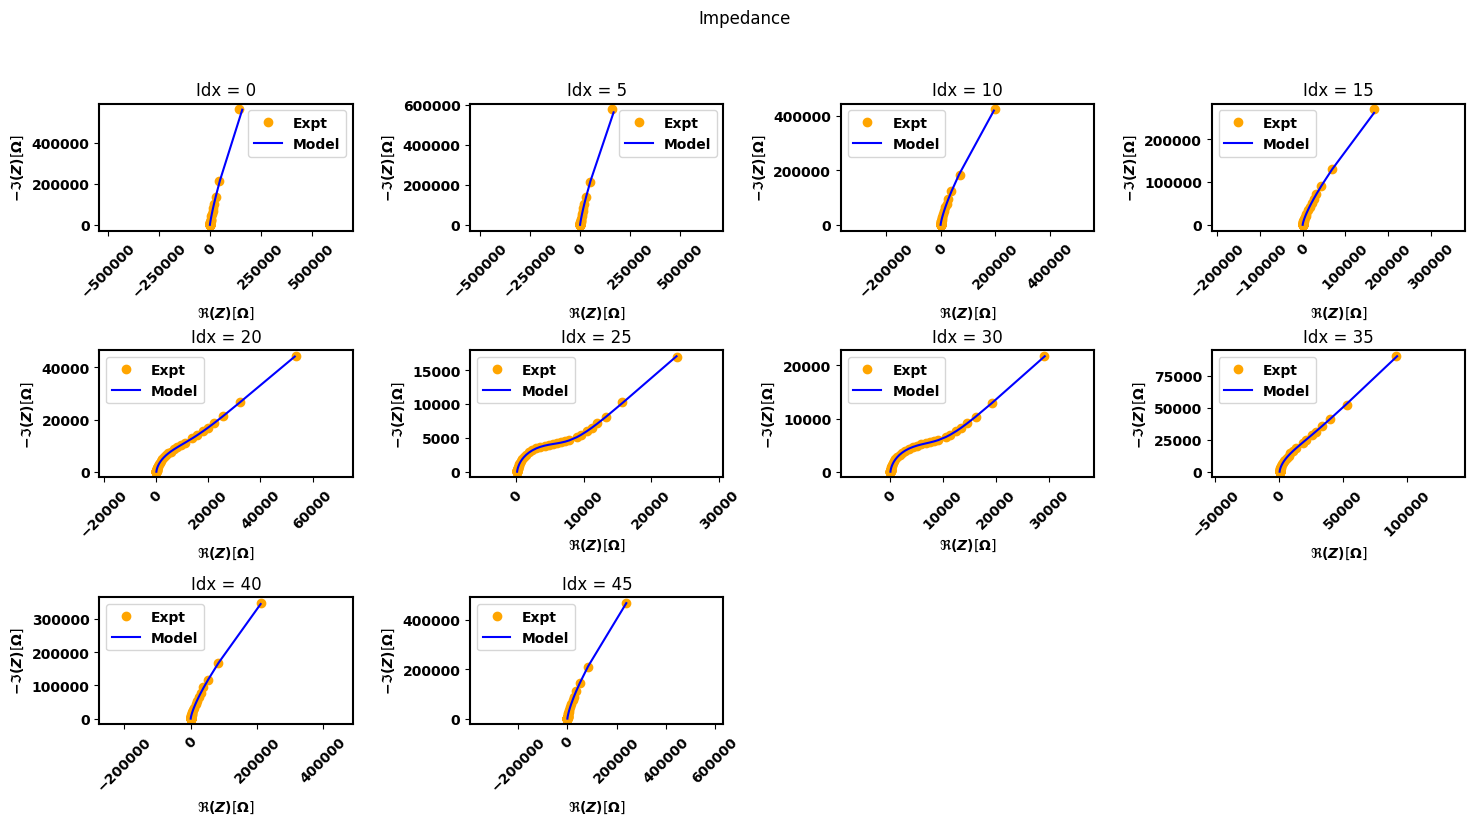

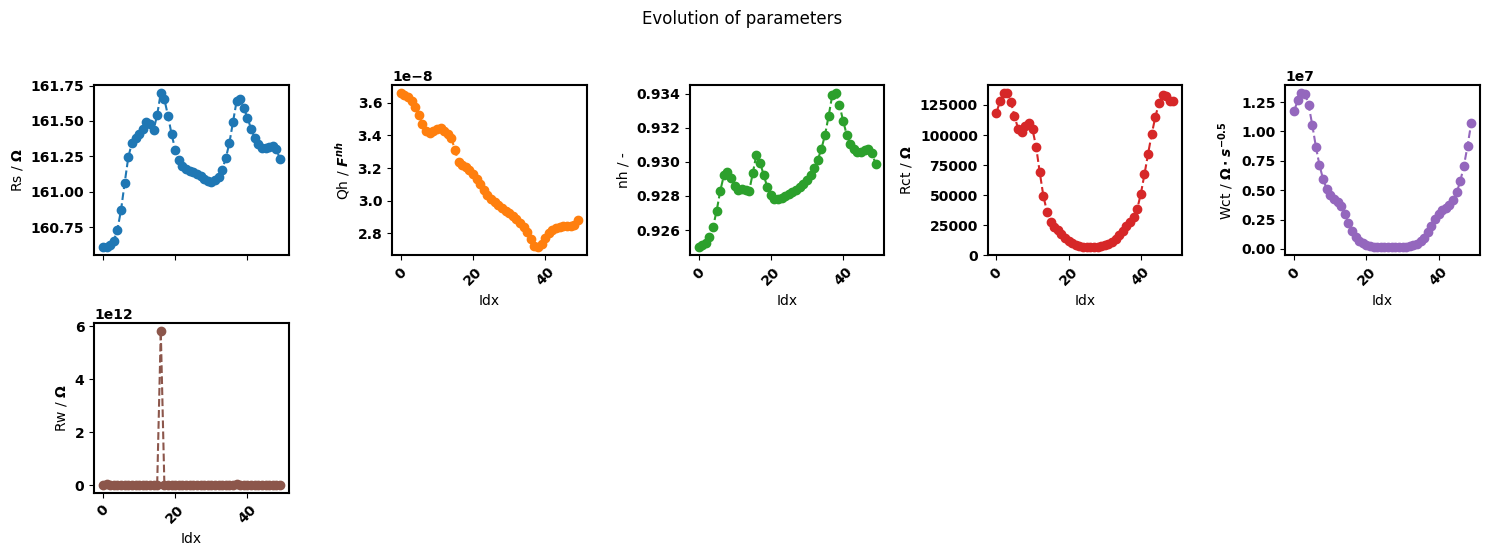

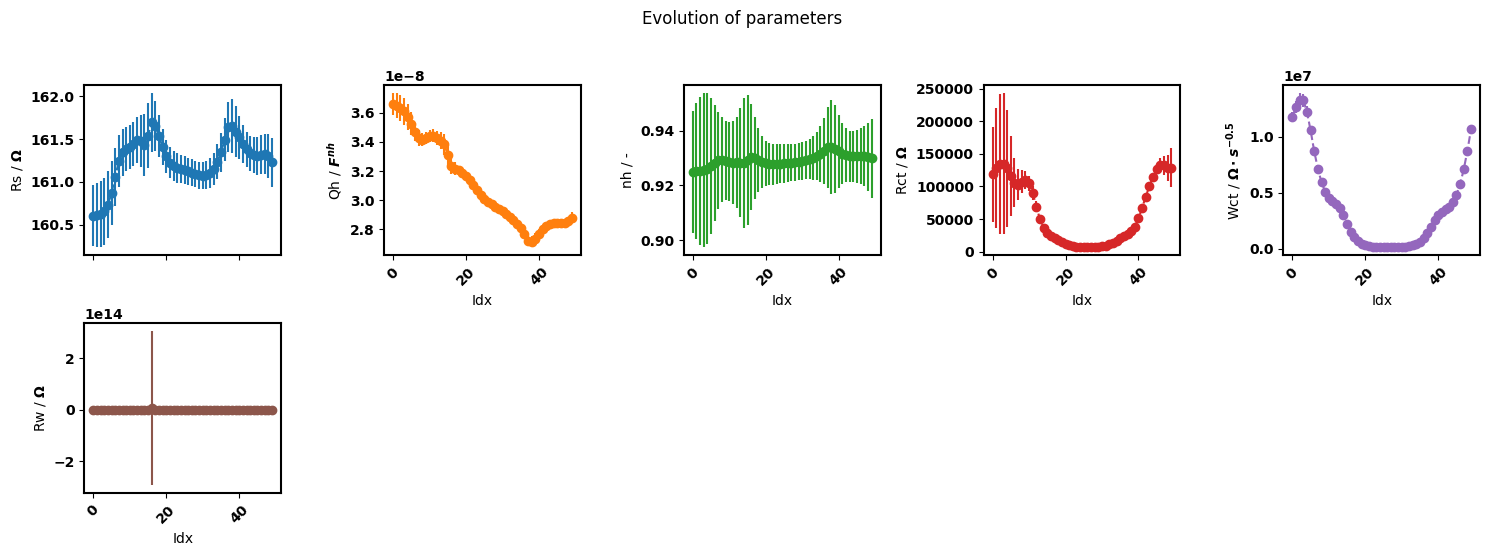

In [ ]:
popt, perr, chisqr, chitot, AIC = eis_redox_modulus.fit_sequential(indices=None)
eis_redox_modulus.plot_nyquist(5)
eis_redox_modulus.plot_params(show_errorbar = False, labels = labels)
eis_redox_modulus.plot_params(show_errorbar = True, labels = labels)

4. Running the Bootstrap MonteCarlo option


Using initial

Optimization complete
total time is 0:00:06.728762 
Please run fit_simultaneous() or fit_stochastic()
              on your data before running the compute_perr_mc() method.
              ignore this message if you did.

Optimization complete
total time is 0:48:30.708104 

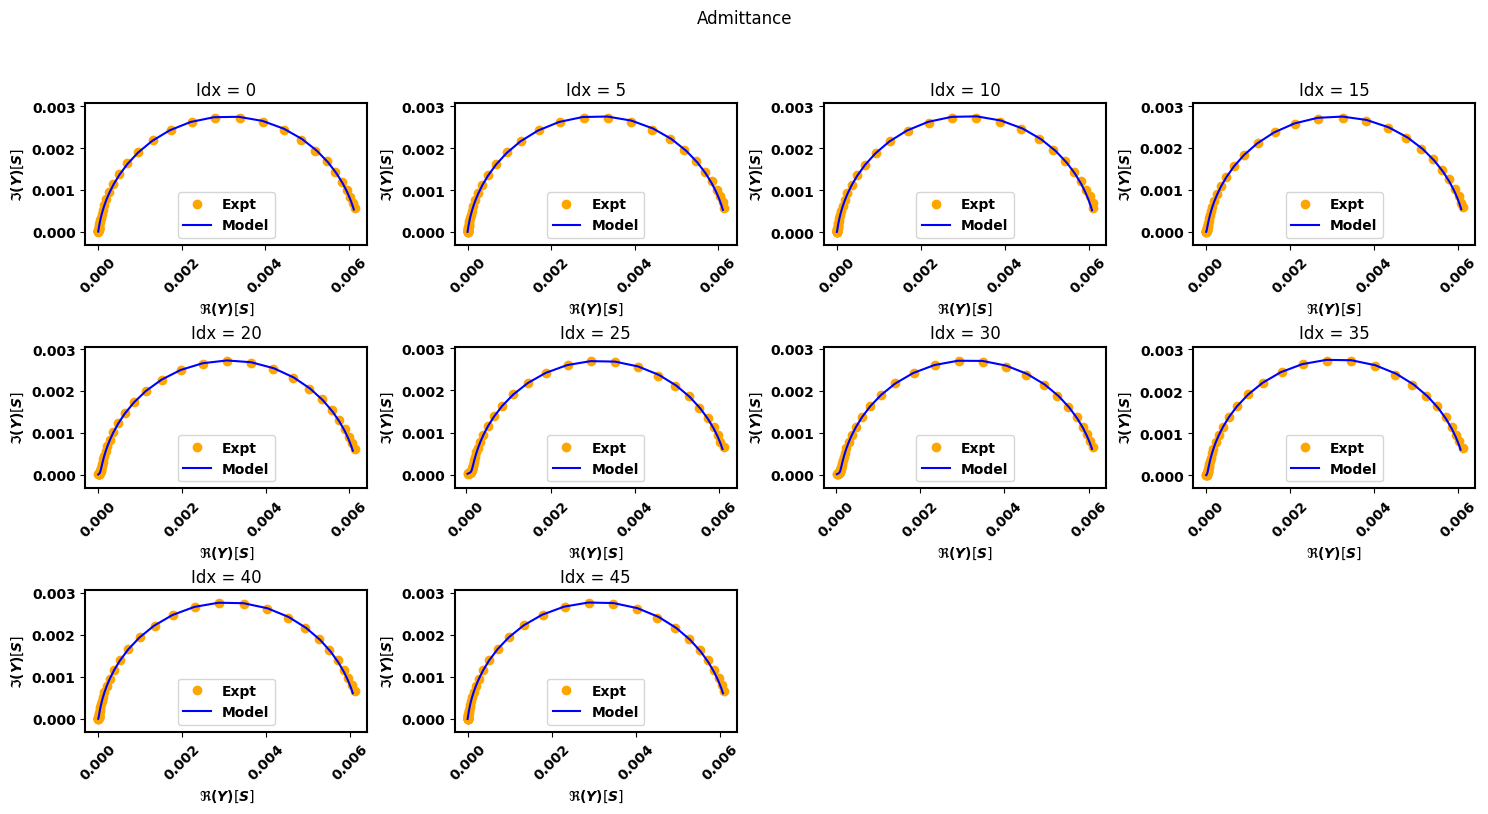

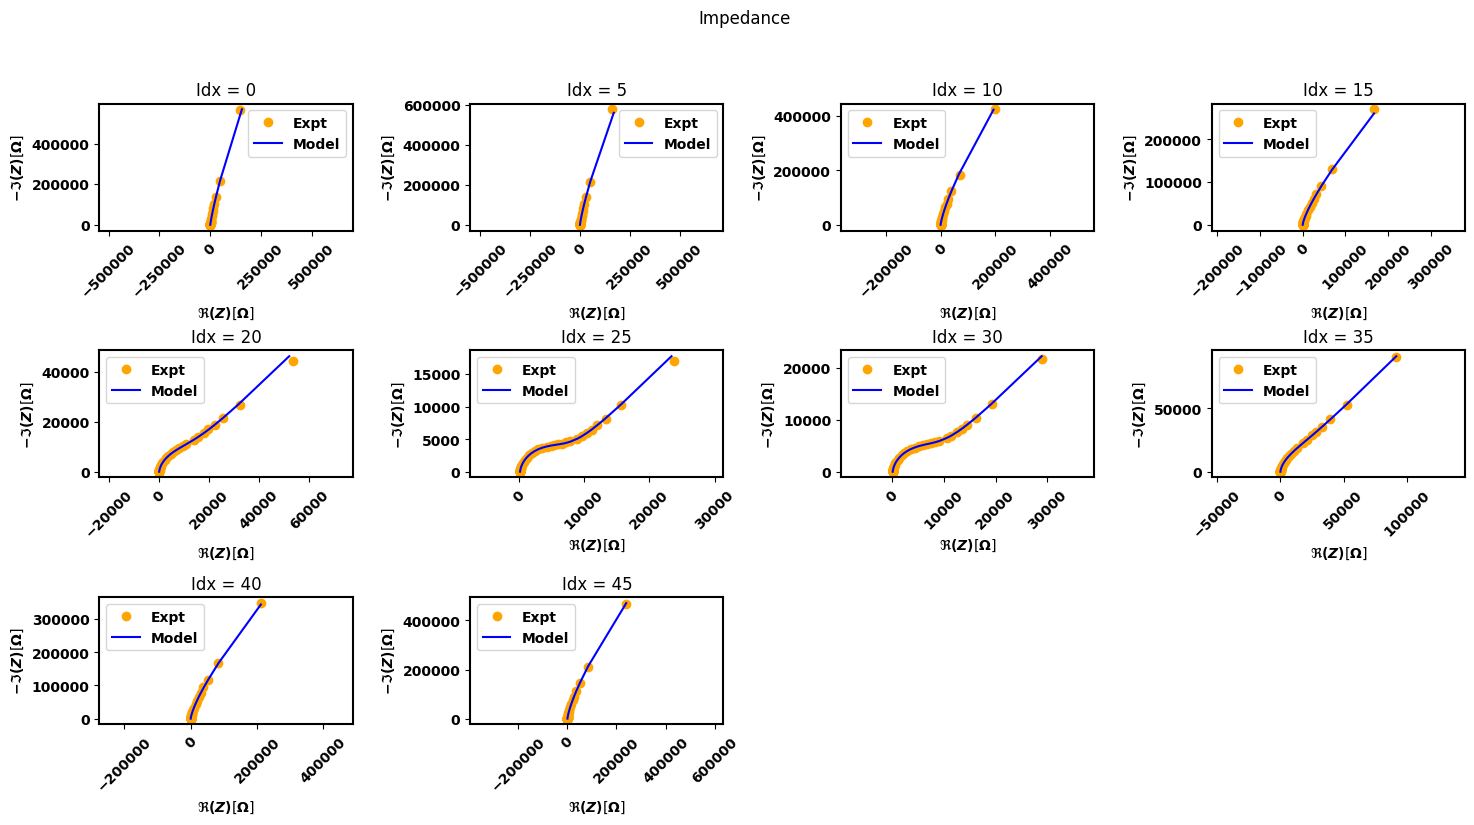

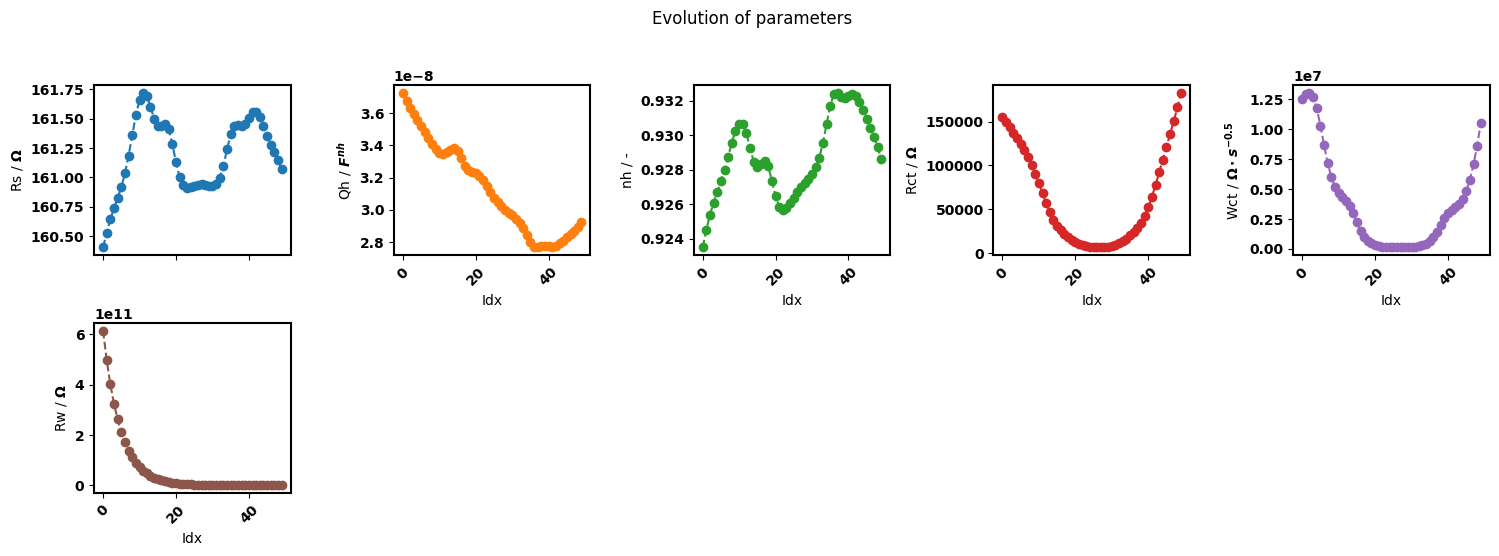

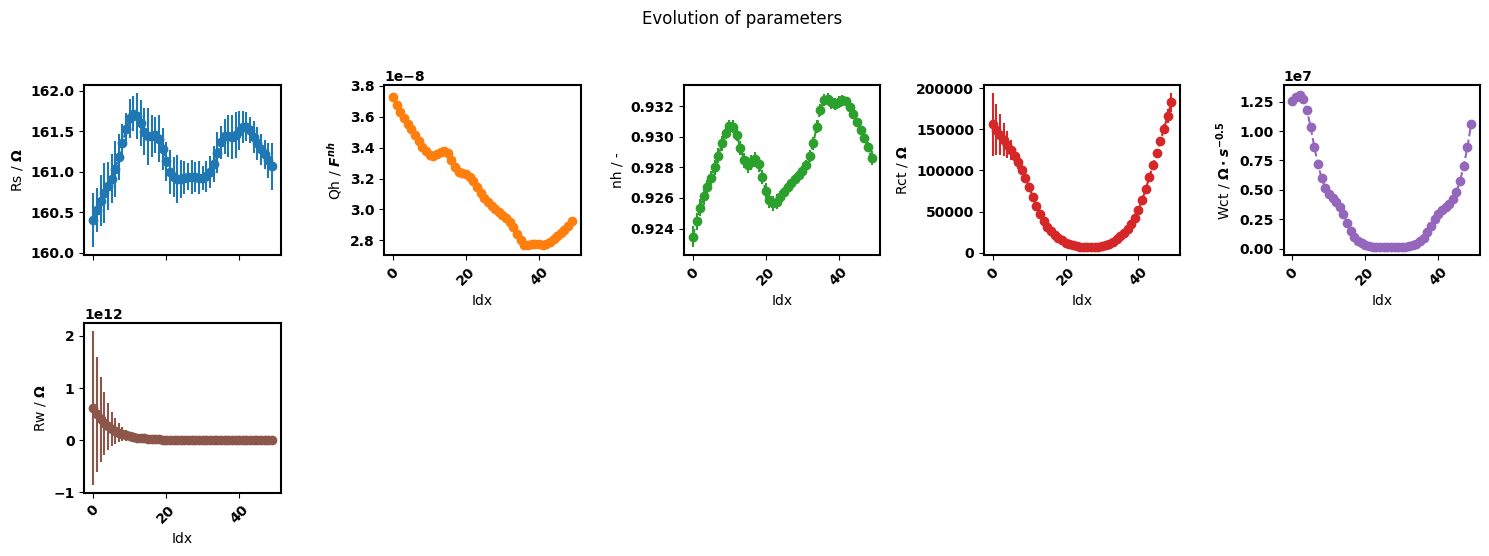

In [ ]:
# Reinstantiate class and fit stochastic
eis_redox_modulus = pym.Multieis(p0, F, Y, bounds, smf_modulus, redox, weight= 'modulus', immittance='admittance')
popt, perr, chisqr, chitot, AIC = eis_redox_modulus.fit_simultaneous(method = 'tnc')
popt, perr, chisqr, chitot, AIC = eis_redox_modulus.compute_perr_mc(n_boots=500)
eis_redox_modulus.plot_nyquist(5)
eis_redox_modulus.plot_params(show_errorbar = False, labels = labels)
eis_redox_modulus.plot_params(show_errorbar = True, labels = labels)

5. Keeping a parameter constant


Using initial

Optimization complete
total time is 0:00:10.220388 

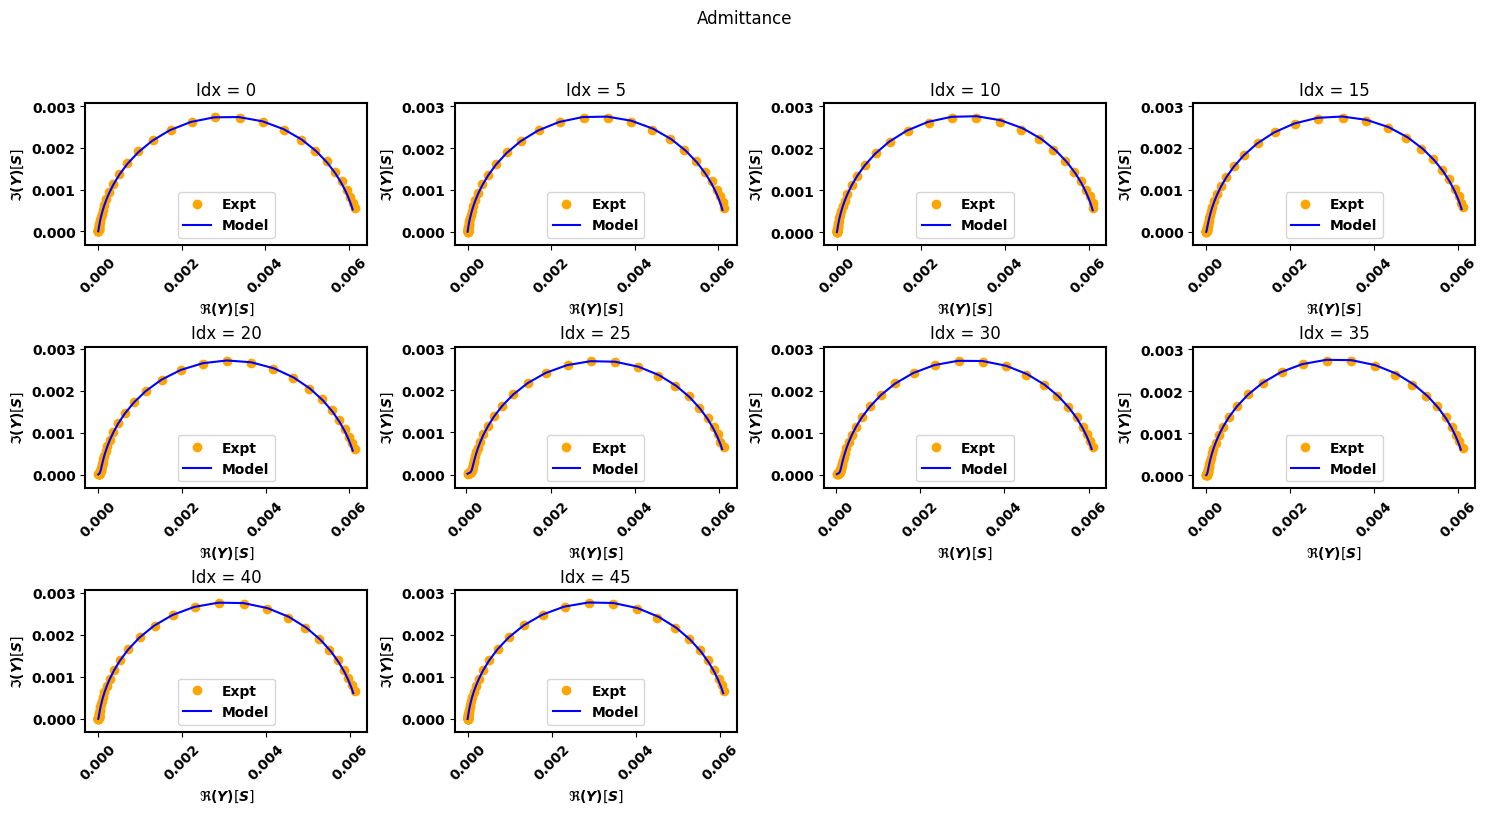

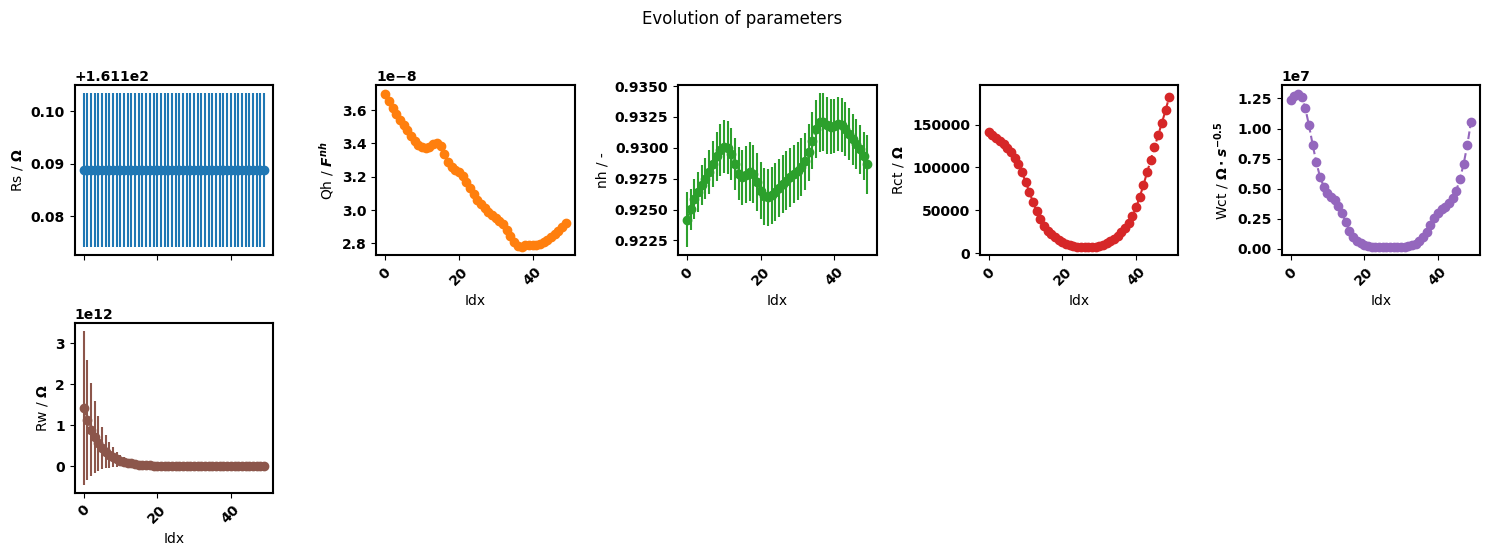

In [ ]:
# Reinstantiate class and fit keeping a parameter constant
smf_const = smf_modulus.at[0].set(jnp.inf) # Here we use JAX's index update syntax to modify the element of smf_modulus
eis_redox_modulus = pym.Multieis(p0, F, Y, bounds, smf_const, redox, weight= 'modulus', immittance='admittance')
popt, perr, chisqr, chitot, AIC = eis_redox_modulus.fit_simultaneous(method = 'tnc')
eis_redox_modulus.plot_nyquist(5)
eis_redox_modulus.plot_params(show_errorbar = False, labels = labels)
eis_redox_modulus.plot_params(show_errorbar = True, labels = labels)

4. Saving the plots

In [ ]:
eis_redox_modulus.save_plot_nyquist(steps=10, fname='example_results')
eis_redox_modulus.save_plot_bode(steps=10, fname='example_results')
eis_redox_modulus.save_plot_params(False, fname='example_results')

5. saving the results

In [ ]:
eis_redox_modulus.save_results(fname='example_results')